# Wine regression

### In the first cell we usually do all the imports together so the will be in one place.

In [288]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors

from sklearn.preprocessing import LabelEncoder
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import sklearn.metrics

### Confusion metrics function

In [285]:
#List of metric for classiffication models

def metrics_classific(y,predicted,X):
    from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
    confusion_matrix = confusion_matrix(y, predicted)
    print(confusion_matrix)
    print(classification_report(y, predicted))

    # Validation ROC-AUC score
    from sklearn.metrics import roc_auc_score
    valid_score = roc_auc_score(y, predicted)
    print('Validation ROC-AUC score:', valid_score)

    # AUC score
    from sklearn.metrics import  auc
   # false_positive_rate, true_positive_rate, thresholds = roc_curve(y, predicted)
   # auc = auc(false_positive_rate, true_positive_rate)
   # print('Validation AUC score:    ', auc)
    print("Accuracy: %.2f%%" % (accuracy_score(y, predicted) * 100.0))

## Presenting the data

In [5]:
red = pd.read_csv(r'C:\Users\Dikla\Desktop\final project data science\Red.csv')
white = pd.read_csv(r'C:\Users\Dikla\Desktop\final project data science\White.csv')
sparkling = pd.read_csv(r'C:\Users\Dikla\Desktop\final project data science\Sparkling.csv')
rose = pd.read_csv(r'C:\Users\Dikla\Desktop\final project data science\Rose.csv')

In [6]:
red.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016


In [7]:
white.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Vermentino 2017,Italy,Toscana,Famiglia Castellani,3.8,25,5.65,2017
1,Ronco Broilo 2010,Italy,Colli Orientali del Friuli,Conte d'Attimis Maniago,4.3,25,44.90,2010
2,Weisser Schiefer s 2017,Austria,Südburgenland,Weinbau Uwe Schiefer,4.2,25,33.25,2017
3,Chardonnay 2018,Germany,Rheinhessen,Krämer - Straight,3.9,25,8.99,2018
4,Maganza Zibibbo 2018,Italy,Terre Siciliane,Luna Gaia,3.9,25,8.60,2018


In [8]:
rose.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Mad Méditerranée Rosé 2019,France,Méditerranée,Château Camparnaud,4.0,25,10.11,2019
1,Redoma Rosé 2019,Portugal,Douro,Niepoort,3.9,25,12.81,2019
2,Fantini Cerasuolo d'Abruzzo 2019,Italy,Abruzzo,Farnese,3.6,25,5.60,2019
3,Mount Hermon Rosé 2017,Israel,Galilee,Hermon,3.4,25,12.14,2017
4,La Villa Rosé 2018,France,Languedoc,Château La Sauvageonne,4.6,25,68.95,2018


In [9]:
sparkling.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Crémant de Loire Brut 2017,France,Crémant de Loire,Langlois-Chateau,3.9,25,14.41,2017
1,Vicar's Choice Sauvignon Blanc Bubbles 2019,New Zealand,Marlborough,Saint Clair,4.2,25,11.90,2019
2,Crémant de Limoux Brut N.V.,France,Crémant de Limoux,Prima Perla,3.5,25,14.32,N.V.
3,Athesis Brut 2016,Italy,Südtirol - Alto Adige,Kettmeir,4.0,25,21.50,2016
4,Blanc de Blancs Réserve Brut Nature N.V.,Germany,Pfalz,Eymann,3.9,25,31.18,N.V.


## We will want to work with one single DataFrame, so we will join the datasets and make feature for wine styles

In [10]:
red['WineStyle'] = 'red'
white['WineStyle'] = 'white'
sparkling['WineStyle'] = 'sparkling'
rose['WineStyle'] = 'rose'
wines =  pd.concat([red, white, sparkling, rose], ignore_index=True)

In [11]:
wines

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,WineStyle
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,red
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,red
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,red
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,red
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,red
...,...,...,...,...,...,...,...,...,...
13829,Côte des Roses Rosé 2019,France,Languedoc,Gérard Bertrand,3.9,1750,9.36,2019,rose
13830,M Rosé 2019,France,Côtes de Provence,Minuty,4.0,2046,12.85,2019,rose
13831,Whispering Angel Rosé 2019,France,Côtes de Provence,Château d'Esclans,4.2,2990,16.47,2019,rose
13832,Vinho Verde Rosé N.V.,Portugal,Vinho Verde,Casal Garcia,3.5,9493,4.35,N.V.,rose


In [12]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13834 entries, 0 to 13833
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             13834 non-null  object 
 1   Country          13834 non-null  object 
 2   Region           13834 non-null  object 
 3   Winery           13834 non-null  object 
 4   Rating           13834 non-null  float64
 5   NumberOfRatings  13834 non-null  int64  
 6   Price            13834 non-null  float64
 7   Year             13834 non-null  object 
 8   WineStyle        13834 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 972.8+ KB


In [210]:
df01 = wines.copy() #making a df copy
index_names = df01[df01.Year == "N.V."].index # droping N.V year which isnt relevant
df01.drop(index_names, inplace=True) #drop
df01['Year'] = df01['Year'].astype('int')

## Now we can see the "year" feature converted from object to int

In [116]:
df01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13090 entries, 0 to 13831
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             13090 non-null  object 
 1   Country          13090 non-null  object 
 2   Region           13090 non-null  object 
 3   Winery           13090 non-null  object 
 4   Rating           13090 non-null  float64
 5   NumberOfRatings  13090 non-null  int64  
 6   Price            13090 non-null  float64
 7   Year             13090 non-null  int32  
 8   WineStyle        13090 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 971.5+ KB


In [117]:
df01.shape

(13090, 9)

In [118]:
df01.describe()

,Rating,NumberOfRatings,Price,Year
count,13090.000000,13090.000000,13090.000000,13090.000000
mean,3.868877,331.887777,33.490910,2015.531780
std,0.298953,734.794482,72.603154,3.276464
min,2.500000,25.000000,3.550000,1961.000000
25%,3.700000,55.000000,9.900000,2015.000000
50%,3.900000,122.000000,15.950000,2016.000000
75%,4.100000,311.000000,32.500000,2018.000000
max,4.900000,20293.000000,3410.790000,2020.000000


### Check if there is null data

In [19]:
df01.isna().sum()

Name               0
Country            0
Region             0
Winery             0
Rating             0
NumberOfRatings    0
Price              0
Year               0
WineStyle          0
dtype: int64

#### We can see there is no null data so we can continue

In [20]:
df01.Country.value_counts()

Italy             3919
France            3436
Spain             1533
Germany           1229
South Africa       846
United States      530
Austria            492
Chile              431
Portugal           336
Australia          318
Argentina          308
New Zealand        165
Brazil              50
Romania             37
Greece              25
Switzerland         23
Israel              23
Hungary             19
Slovenia            18
Moldova             16
Lebanon             16
Luxembourg          14
Georgia             13
Turkey              10
Croatia              6
Uruguay              5
China                3
Canada               3
United Kingdom       3
Czech Republic       2
Slovakia             2
Bulgaria             2
Mexico               1
Name: Country, dtype: int64

### There is 33 countries as we can see, but countries with small amounts don't interest us. We can analyze countries with the largest export volume

In [21]:
LEV_countries = wines.Country.value_counts()[:12] #Countries with the largest export volume (over 100)

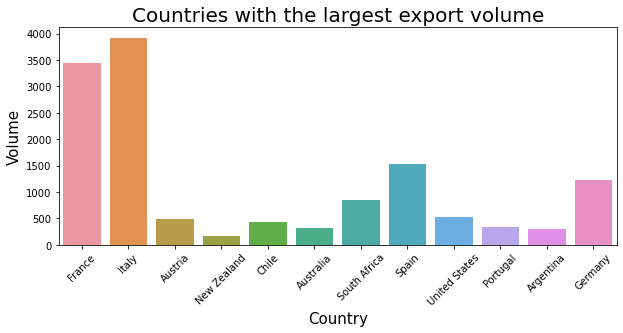

In [22]:
plt.figure(figsize=(10,4))

country = wines.Country.value_counts()[:12] #taking the 12 most affective countries (12 first columns)

graph = sns.countplot(x='Country', 
                  data=wines[wines.Country.isin(LEV_countries.index.values)])
graph.set_title("Countries with the largest export volume", fontsize=20) #title and font
graph.set_xlabel("Country", fontsize=15) #label
graph.set_ylabel("Volume", fontsize=15) #label
graph.set_xticklabels(graph.get_xticklabels(),rotation=45) # rotation = of the font above

plt.show()

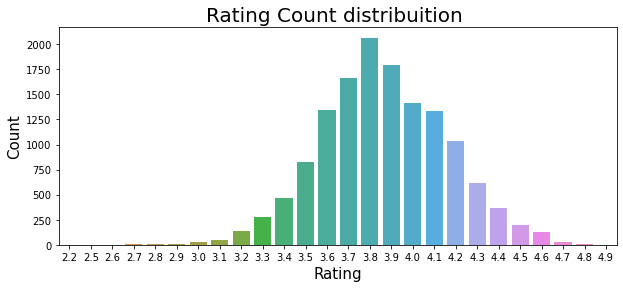

In [23]:
plt.figure(figsize=(10, 4))
graph = sns.countplot(x='Rating', data=wines) #df + label 
graph.set_title("Rating Count distribuition ", fontsize=20) #title
graph.set_xlabel("Rating", fontsize=15) # label
graph.set_ylabel("Count", fontsize=15) #label
plt.show()

#### The common thinking is that good wine must be expensive. the tendency is to belive that as long as the wine rate is high, the wine's price will be higher as well. there are a lot of wines with 4+ rating for just 7 euros and 4.4+ rating for 20 euros as we can see in the rating and price distribution below. So, you can find a good wine for any wallet

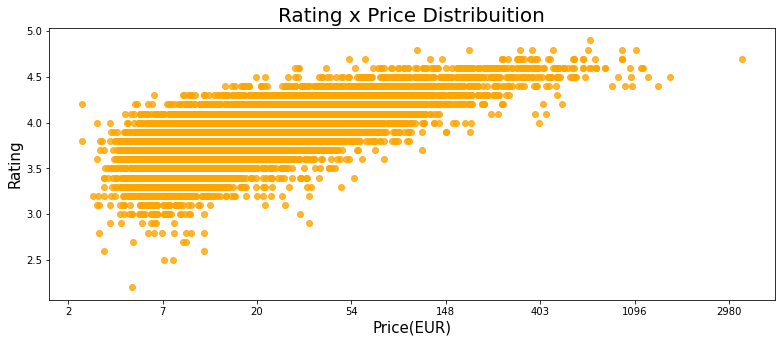

In [24]:
plt.figure(figsize=(13,5))

graph = sns.regplot(x=np.log(wines['Price']), y='Rating', #type of gragh
                    data=wines, fit_reg=False, color='orange')
graph.set_title("Rating x Price Distribuition", fontsize=20) #title
graph.set_xlabel("Price(EUR)", fontsize= 15) # label
graph.set_ylabel("Rating", fontsize= 15) # label
graph.set_xticklabels(np.exp(graph.get_xticks()).astype(int)) 

plt.show()

#### We can see it perfectly on a corellation grapghics . We can see that the corelletion between the price of the wine with its rate isnt very high, less than 0.5.
#### We can see as well that the corellation between rating and price is the highst of all features. We can learn about the wine that none of these features make any significant effect on its rating.

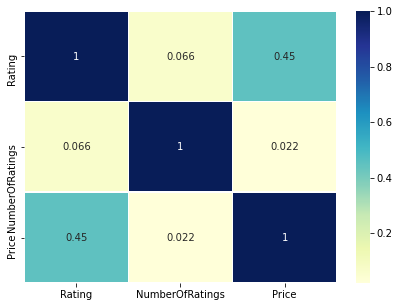

In [25]:
corrs = wines[['Rating','NumberOfRatings','Price','Year']].corr() #Heatmap for numetrical columns
fig, ax = plt.subplots(figsize=(7,5))    #type of gragh    

sns.heatmap(corrs,annot = True,ax=ax,linewidths=.6, cmap = 'YlGnBu');

In [223]:
df02 = df01.copy()

### We want to make all our data numeric so we can work only with numbers and do our models.

In [229]:
#from sklearn.preprocessing import LabelEncoder
# Encode target labels with value between 0 and n_classes-1.
# 0 = red
# 1 = rose
# 2 = sparkling
# 3 = white
encoder=LabelEncoder()
df02['WineStyle']=encoder.fit_transform(df02['WineStyle'])

In [230]:
encoder=LabelEncoder()
df02['Country']=encoder.fit_transform(df02['Country'])

encoder=LabelEncoder()
df02['Name']=encoder.fit_transform(df02['Name'])

encoder=LabelEncoder()
df02['Region']=encoder.fit_transform(df02['Region'])

encoder=LabelEncoder()
df02['Winery']=encoder.fit_transform(df02['Winery'])

In [231]:
df02

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,WineStyle
0,6934,10,551,749,4.2,100,95.00,2011,0
1,5317,10,385,848,4.3,100,15.50,2017,0
2,3202,16,723,2671,3.9,100,7.45,2015,0
3,721,16,60,526,3.5,100,8.72,2019,0
4,7526,2,139,2182,3.9,100,29.15,2016,0
...,...,...,...,...,...,...,...,...,...
13827,7858,10,229,9,4.0,1078,13.90,2019,1
13828,7791,16,391,1209,4.1,1137,11.20,2019,1
13829,2654,10,374,1740,3.9,1750,9.36,2019,1
13830,5453,10,250,2278,4.0,2046,12.85,2019,1


### We will erase the columns 'Name' and 'Winery' because there are so many names of these features so we can understand there is no influance on the pricing. There are so much names of wines and wineries that they have minimum affect on the results and we can just erase them. 

In [132]:
df02.drop(['Name', 'Winery'], axis=1, inplace=True)
df02

,Country,Region,Rating,NumberOfRatings,Price,Year,WineStyle
0,France,Pomerol,4.2,100,95.00,2011,red
1,France,Lirac,4.3,100,15.50,2017,red
2,Italy,Toscana,3.9,100,7.45,2015,red
3,Italy,Bardolino,3.5,100,8.72,2019,red
4,Austria,Carnuntum,3.9,100,29.15,2016,red
...,...,...,...,...,...,...,...
13827,France,Coteaux d'Aix-en-Provence,4.0,1078,13.90,2019,rose
13828,Italy,Lombardia,4.1,1137,11.20,2019,rose
13829,France,Languedoc,3.9,1750,9.36,2019,rose
13830,France,Côtes de Provence,4.0,2046,12.85,2019,rose


***
### Normalization

In [263]:
# get_dummies is a function who can do normalization.
# get_dummies = Convert categorical variable into dummy/indicator variables
# we prefer to do this that way so the model whould not ' prefer ' a higher random given number on some features and will be confused by it. 
df03 = pd.get_dummies(data=df01, columns=['Country', 'Region', 'WineStyle'])

In [264]:
df03

,Name,Winery,Rating,NumberOfRatings,Price,Year,Country_Argentina,Country_Australia,Country_Austria,Country_Brazil,...,Region_Zeltingen,Region_Zürich,Region_d Minis,Region_delle Venezie,Region_Échezeaux Grand Cru,Region_Štajerska,WineStyle_red,WineStyle_rose,WineStyle_sparkling,WineStyle_white
0,Pomerol 2011,Château La Providence,4.2,100,95.00,2011,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Lirac 2017,Château Mont-Redon,4.3,100,15.50,2017,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Erta e China Rosso di Toscana 2015,Renzo Masi,3.9,100,7.45,2015,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,Bardolino 2019,Cavalchina,3.5,100,8.72,2019,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Ried Scheibner Pinot Noir 2016,Markowitsch,3.9,100,29.15,2016,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13827,Rosé 2019,AIX,4.0,1078,13.90,2019,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13828,Rosa dei Frati Riviera del Garda Classico Rosé...,Cà dei Frati,4.1,1137,11.20,2019,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13829,Côte des Roses Rosé 2019,Gérard Bertrand,3.9,1750,9.36,2019,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13830,M Rosé 2019,Minuty,4.0,2046,12.85,2019,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [89]:
#from sklearn.dummy import DummyRegressor
#from sklearn.model_selection import train_test_split
#import sklearn.metrics

In [200]:
df01

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,WineStyle
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,red
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,red
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,red
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,red
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,red
...,...,...,...,...,...,...,...,...,...
13827,Rosé 2019,France,Coteaux d'Aix-en-Provence,AIX,4.0,1078,13.90,2019,rose
13828,Rosa dei Frati Riviera del Garda Classico Rosé...,Italy,Lombardia,Cà dei Frati,4.1,1137,11.20,2019,rose
13829,Côte des Roses Rosé 2019,France,Languedoc,Gérard Bertrand,3.9,1750,9.36,2019,rose
13830,M Rosé 2019,France,Côtes de Provence,Minuty,4.0,2046,12.85,2019,rose


# Models

In [232]:
# we want to drop once the 'price' column so we can train our model correctly.
y = df02['Price']
X = df02.drop('Price', axis = 1)
scaler = StandardScaler() #normalization
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns) #fit = fit to the data

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

### Dummy

### Usually we will make dummy-classifier to show our results compared to this 'dummy' one.
### The comparision can show us if our model is better than superficial results, so we can notice the progress.

In [166]:
dummy_r = DummyRegressor(strategy= 'median') #here we can use 'median' becasue it takes exacctly the middle point of the pricing.
dummy_r.fit(without_price_train, price_col_train)
dummmy_pred = dummy_r.predict(without_price_test)
metrics.mean_absolute_error(y_true= price_col_test,y_pred = dummmy_pred )

23.846136610046987

In [286]:
dummy_r.score(without_price_train,price_col_train) #the best results should be closest to 1.

-0.067354587126784

# Linear Regression

### Linear regression is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables. In linear regression, the relationships are modeled using linear predictor functions whose unknown model parameters are estimated from the data.


In [95]:
#from sklearn.linear_model import LinearRegression

In [260]:
lin_reg = LinearRegression()

In [238]:
lin_reg.fit(X_train, y_train) # fitting the data

LinearRegression()

In [239]:
accuracy = lin_reg.score(X_test, y_test)
print(accuracy*100,'%') #print the score results (success results)

18.2640847082125 %


### We can learn from that score of 18% that we do not have any outstanding linear correlation between our featuers. We'll try another models types.

# Ridge Model

### This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. This estimator has built-in support for multi-variate regression

In [249]:
from sklearn.linear_model import Ridge, Lasso
rng = np.random.RandomState(0)

In [248]:
rng = Ridge(alpha=1.0, solver='saga')
rng.fit(X_train, y_train)
rng.score(X_test, y_test)

0.18263755820521999

### same score of 18%

# Lasso model

### Lasso regression is a parsimonious model that performs L1 regularization. The L1 regularization adds a penalty equivalent to the absolute magnitude of regression coefficients and tries to minimize them. The equation of lasso is similar to ridge regression.

In [250]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

0.18102023573275106

### same score of 18%

# Random Forest model

### Random Forest model base on decision trees. this model has the ability to know which feature contains the most significant information. it "runs" on all features and tests which feature manages to divide the data to the most accurate division percentages. Random Forest model builds many decision trees for all features, and any new wine we need to calssify, will be applied on all these trees until it makes a decision wiche lable it is.

In [259]:
#from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(criterion='mae', random_state=0) # MAE is the mean absolut error results.
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.42760737475027666

### we can see that with the Random Forest model we could get 42% of sucsses unlike the Linear Regression model which has 18% sucsses only.

# The End